In [5]:
import pandas as pd
from sklearn.cluster import KMeans  # pip install scikit-learn
import matplotlib.pyplot as plt  # pip install matplotlib or pip3 install matplotlib
from sklearn.preprocessing import StandardScaler

u_df = pd.read_csv("udemy_courses.csv")


In [19]:
#view dataset
u_df = pd.read_csv("udemy_courses.csv")
u_df.head()


u_df = u_df.dropna(subset=["course_title", "is_paid", "price", "num_subscribers", "num_reviews", "num_lectures", "level", "content_duration", "published_timestamp"])
u_df = u_df[u_df['price']>0]

#making level column to be categorical
u_df['level'] = u_df['level'].astype('category')

#clustering features being used
features = ['price', 'num_subscribers', 'num_reviews', 'num_lectures', 'content_duration']
U= u_df[features]

#scaling features
scaler = StandardScaler()
U_scaled = scaler.fit_transform(X)




[12213.483438842792, 9526.109440862292, 6672.394056770639, 5679.049337030298, 4718.238934393858, 4316.539612219409, 3960.431495505676, 3539.71109625369, 3366.710474349201]


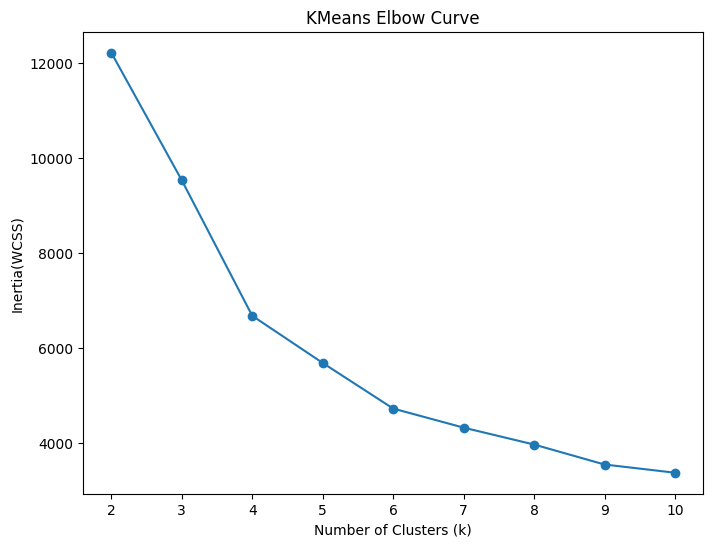

In [27]:
#using the elbow method to choose the optimal number of clusters to choose k
# KMeans clustering to calculate inertia values
inertia_values = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans = kmeans.fit(U_scaled)
    inertia_values.append(kmeans.inertia_)   

print(inertia_values)

#Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), inertia_values, marker='o')
plt.title('KMeans Elbow Curve')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia(WCSS)')
plt.show()

    


In [29]:
#Based on the k plot
k_means = 6
kmeans = KMeans(n_clusters=k_means, random_state= 0)
u_df['cluster'] = kmeans.fit_predict(U_scaled)

In [55]:
# View average metrics per cluster
cluster_metrics = u_df.groupby('cluster')[features + ['num_reviews']].mean().round(2)
print(cluster_metrics)

import matplotlib.pyplot as plt





          price  num_subscribers  num_reviews  num_lectures  content_duration  \
cluster                                                                         
0         97.82          2710.61       212.47        114.13             12.29   
1        155.73          8084.48       705.79        322.85             40.50   
2         42.35          1326.64        34.80         26.47              2.51   
3        189.38         79171.75     16497.25        215.62             22.94   
4        177.36          2515.23        79.86         36.11              3.46   
5        118.23         27530.25      1288.85         74.46              7.46   

         num_reviews  
cluster               
0             212.47  
1             705.79  
2              34.80  
3           16497.25  
4              79.86  
5            1288.85  


<Figure size 1500x1000 with 0 Axes>

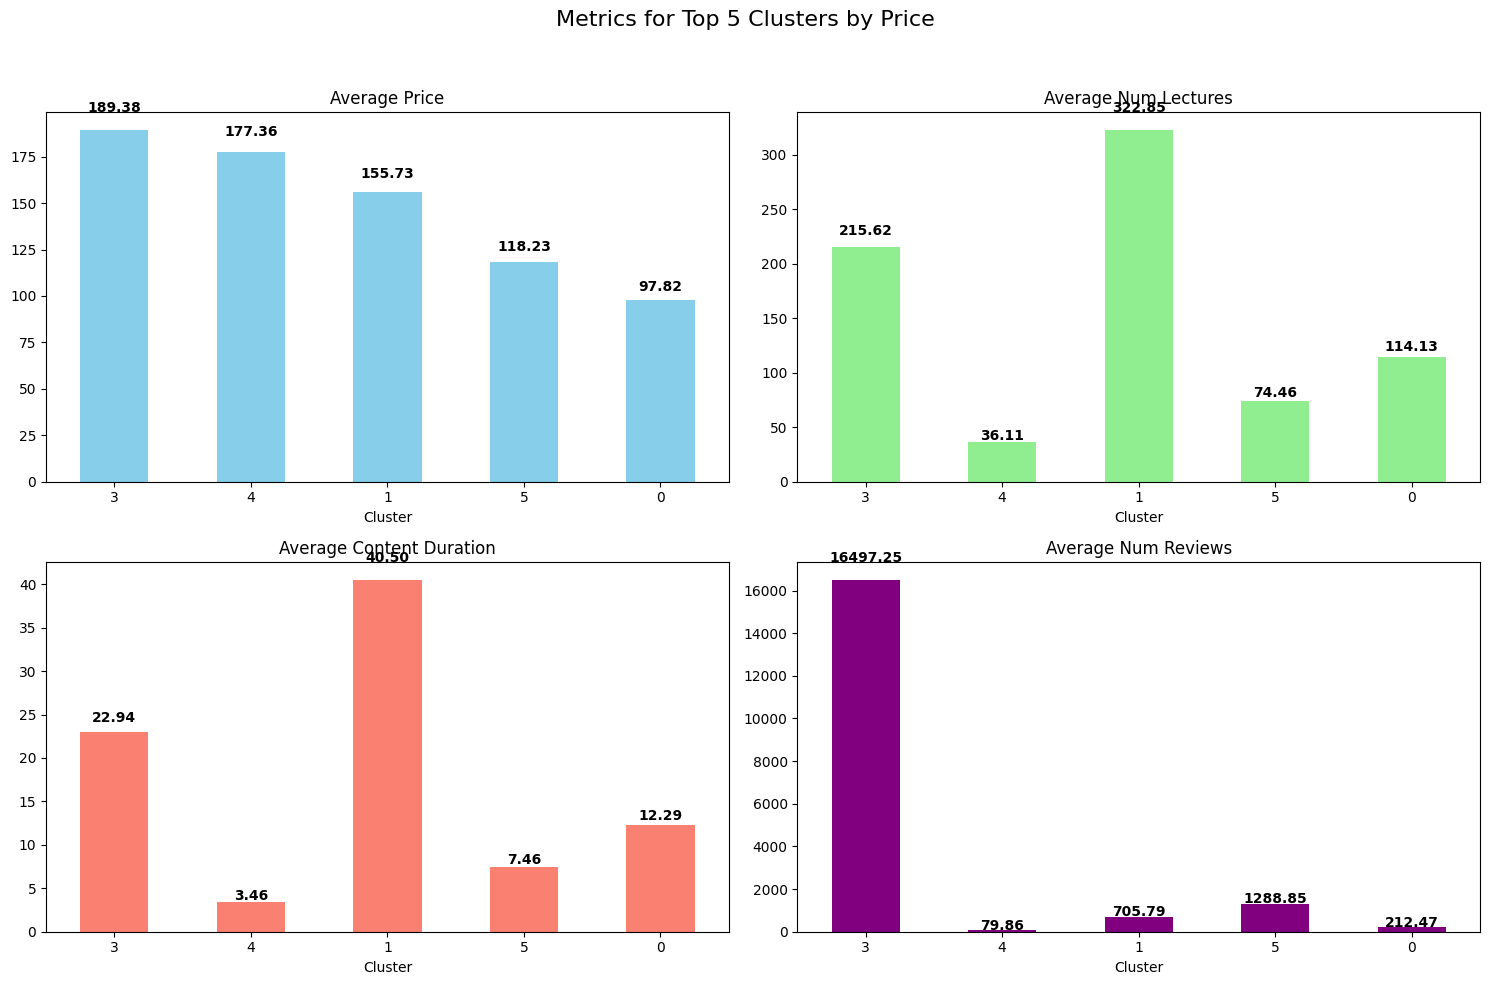

In [75]:
# Define the features you want to analyze
# Create a more detailed visualization of the top price clusters
plt.figure(figsize=(15, 10))

# Create subplots for each metric
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Metrics for Top 5 Clusters by Price', fontsize=16)

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot each metric
metrics = ['price', 'num_lectures', 'content_duration', 'num_reviews']
colors = ['skyblue', 'lightgreen', 'salmon', 'purple']


for i, (metric, color) in enumerate(zip(metrics, colors)):
    top_clusters_by_price[metric].plot(kind='bar', ax=axes[i], color=color)
    axes[i].set_title(f'Average {metric.replace("_", " ").title()}', fontsize=12)
    axes[i].set_xlabel('Cluster', fontsize=10)
    axes[i].tick_params(axis='x', rotation=0)
    
    # Add value labels on top of each bar
    for j, val in enumerate(top_clusters_by_price[metric]):
        axes[i].text(j, val + (val*0.05), f'{val:.2f}', ha='center', fontweight='bold')

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make room for the title
plt.show()
